In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
csv_path = "/Users/avafinn/PycharmProjects/student_performance_portfolio_project/data/processed/student_exam_scores_clean.csv"
df = pd.read_csv(csv_path)

In [5]:
features = ['hours_studied', 'sleep_hours', 'attendance_percent']
target = 'exam_score_percent'

X = df[features]
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
r2 = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [13]:
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


R² Score: 0.729
Mean Absolute Error (MAE): 5.27
Root Mean Squared Error (RMSE): 6.32
Mean Absolute Percentage Error (MAPE): 9.73%


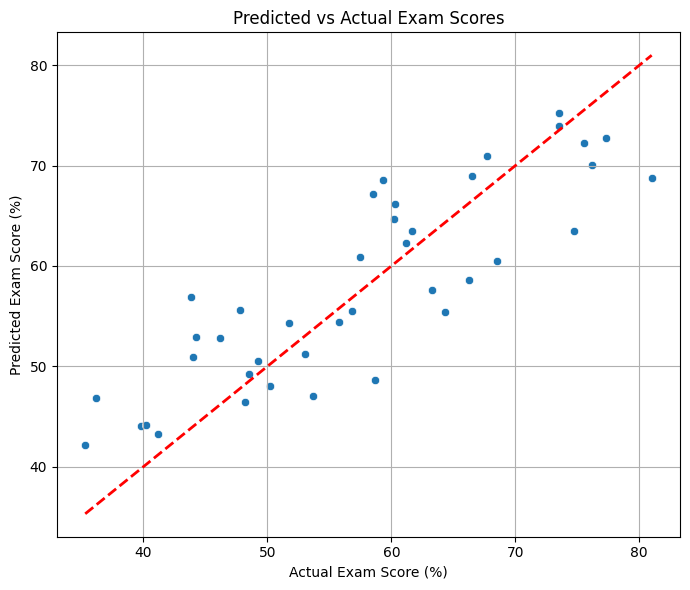

In [14]:
plt.figure(figsize=(7,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', lw=2)
plt.xlabel('Actual Exam Score (%)')
plt.ylabel('Predicted Exam Score (%)')
plt.title('Predicted vs Actual Exam Scores')
plt.grid(True)
plt.tight_layout()
plt.show()


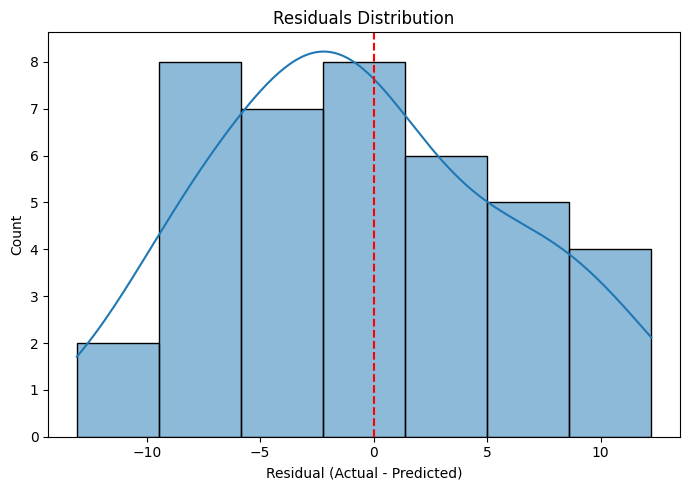

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
sns.histplot(residuals, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Residuals Distribution')
plt.xlabel('Residual (Actual - Predicted)')
plt.tight_layout()
plt.show()

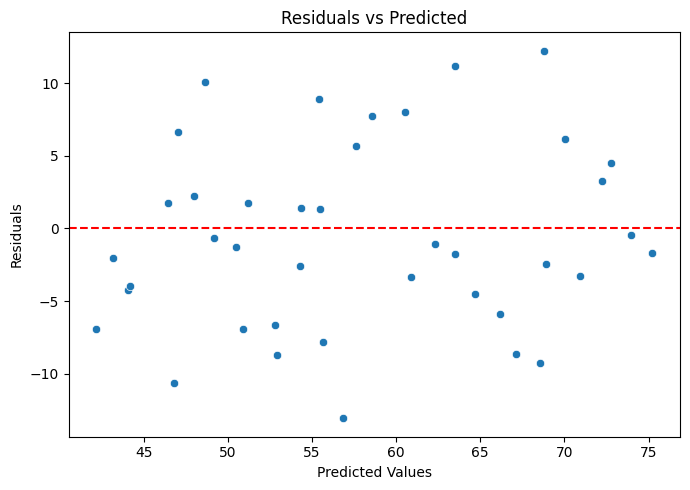

In [16]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.tight_layout()
plt.show()